In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = sc.read("data_with_PCA_umap.h5ad")

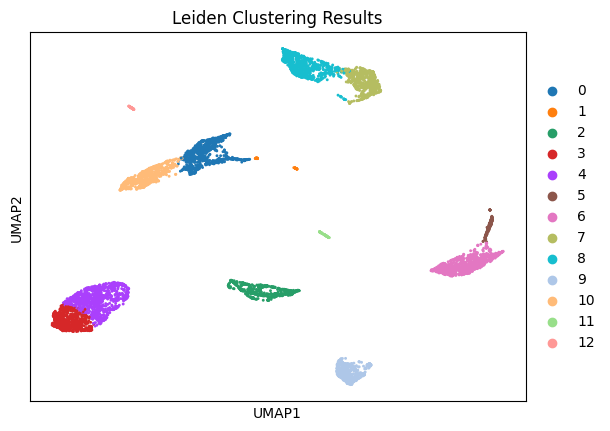

In [4]:
# Plot the UMAP with Leiden clustering results
sc.pl.umap(data, color='leiden', title='Leiden Clustering Results')

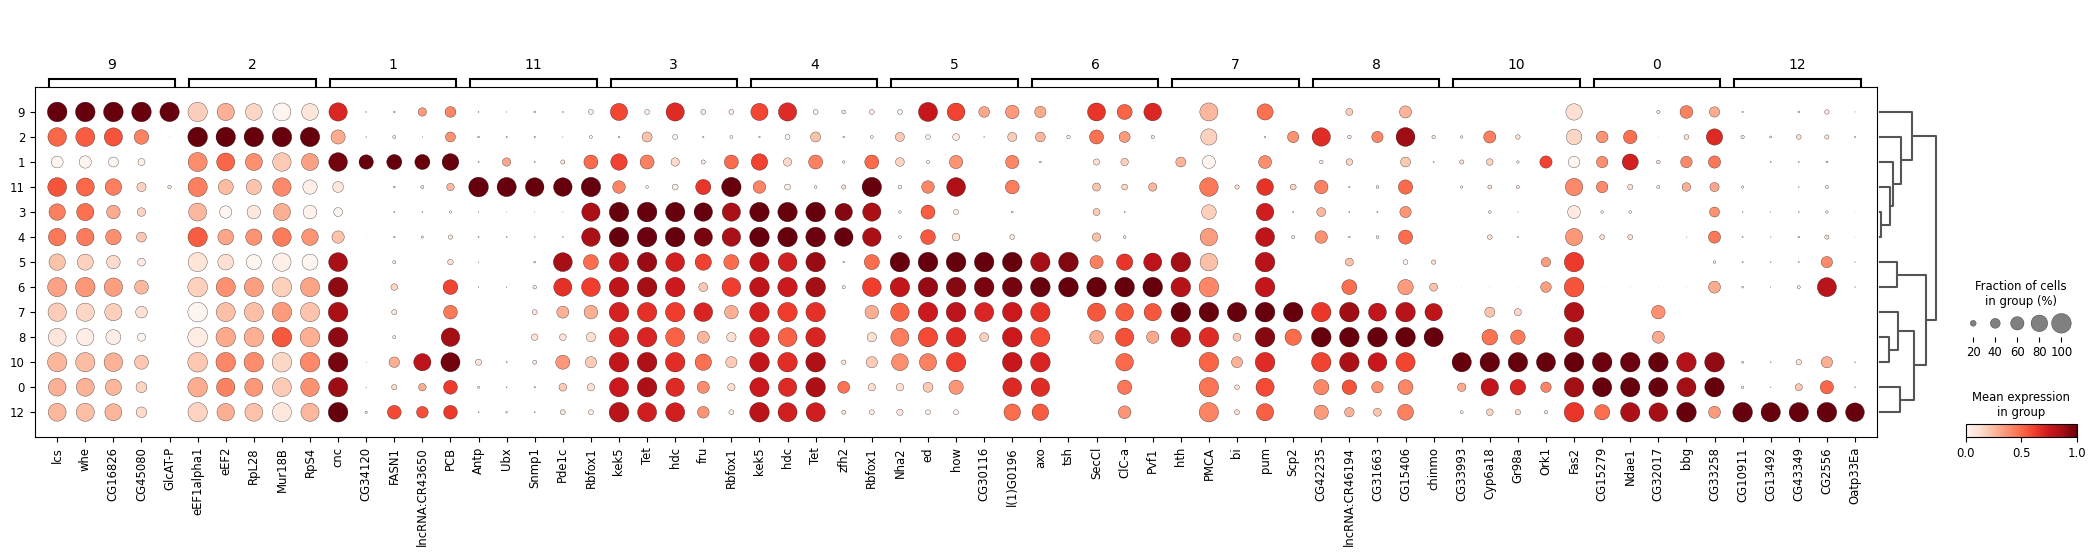

In [11]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(data, groupby="leiden", method="wilcoxon")

sc.pl.rank_genes_groups_dotplot(data, groupby="leiden", standard_scale="var", n_genes=5)

In [13]:
sc.get.rank_genes_groups_df(data, group="9").head(5)

,names,scores,logfoldchanges,pvals,pvals_adj
0,lcs,37.235668,6.793715,1.807639e-303,1.284030e-299
1,whe,37.228104,6.804311,2.396248e-303,1.284030e-299
2,CG16826,37.183151,7.447646,1.277564e-302,4.563884e-299
3,CG45080,36.983635,9.044053,2.098783e-299,5.623163e-296
4,GlcAT-P,36.956581,18.581573,5.709965e-299,1.223874e-295
